In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
 df = pd.read_csv("./Apple/dataset_lookback_60_labelwindow_5.csv")

In [3]:
df

,Date,features,labels
0,1981-03-10,[0.09945 0.094261 0.087343 0.089504 0.092099 ...,Up
1,1981-03-11,[0.094261 0.087343 0.089504 0.092099 0.09772 ...,Up
2,1981-03-12,[0.087343 0.089504 0.092099 0.09772 0.102476 ...,Up
3,1981-03-13,[0.089504 0.092099 0.09772 0.102476 0.1068 ...,Up
4,1981-03-16,[0.092099 0.09772 0.102476 0.1068 0.112421 ...,Up
...,...,...,...
9526,2018-12-17,[52.11507 52.864506 53.199715 52.775913 53.86...,Down
9527,2018-12-18,[52.864506 53.199715 52.775913 53.860542 54.04...,Down
9528,2018-12-19,[53.199715 52.775913 53.860542 54.049706 54.41...,Down
9529,2018-12-20,[52.775913 53.860542 54.049706 54.413639 54.89...,Down


In [4]:
df['labels'].value_counts()

Up      5051
Down    4480
Name: labels, dtype: int64

In [4]:
# data = np.sin(2 * np.pi * np.linspace(0, 1, 128)) + 0.5 * np.random.randn(128)
data = df['features'][8].replace('[', '').replace(']', '').replace('\n', '').split()
data = [float(val) for val in data]

data = np.array(data)
print(data)

[0.112421 0.122799 0.124528 0.121502 0.118043 0.11934  0.116746 0.111556
 0.1068   0.104639 0.110259 0.109395 0.105503 0.105936 0.108098 0.107233
 0.113718 0.110259 0.112421 0.113718 0.113286 0.111556 0.110692 0.107233
 0.103342 0.09772  0.092099 0.095558 0.099017 0.099017 0.09945  0.094261
 0.094261 0.091235 0.090369 0.088207 0.090369 0.094261 0.08864  0.083884
 0.085181 0.082154 0.087343 0.08864  0.091667 0.092099 0.090802 0.089937
 0.089504 0.08864  0.081722 0.07783  0.074803 0.07783  0.076965 0.079992
 0.083884 0.089072 0.088207 0.089072]


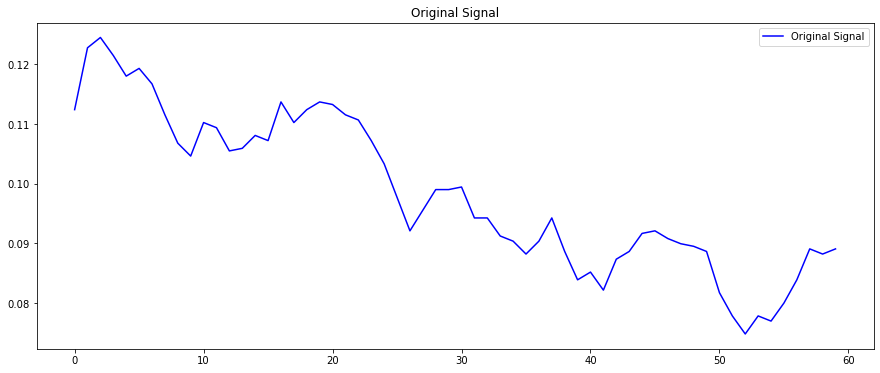

In [5]:
# Plot
plt.figure(figsize=(15, 6))
plt.plot(data, color='blue', label='Original Signal')
plt.legend()
plt.title("Original Signal")
plt.show()

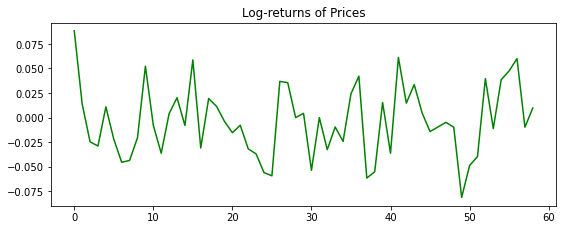

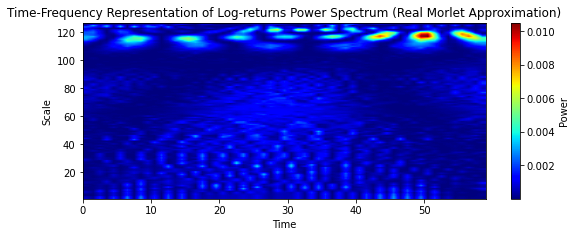

In [7]:
log_returns = np.diff(np.log(data))

# Compute the continuous wavelet transform (CWT) using Morlet wavelet
widths = np.arange(1, 128)  # arbitrary range of scales
cwtmatr, _ = pywt.cwt(log_returns, widths, 'morl')

# Compute the power spectrum
power_spectrum = np.real(cwtmatr)**2

# Visualization
# Visualization
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(log_returns, color='green')
plt.title('Log-returns of Prices')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 2)
plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear')
plt.colorbar(label="Power")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title('Time-Frequency Representation of Log-returns Power Spectrum (Real Morlet Approximation)')
plt.tight_layout()
plt.show()


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df

,Date,features,labels
0,1981-03-10,[0.09945 0.094261 0.087343 0.089504 0.092099 ...,Up
1,1981-03-11,[0.094261 0.087343 0.089504 0.092099 0.09772 ...,Up
2,1981-03-12,[0.087343 0.089504 0.092099 0.09772 0.102476 ...,Up
3,1981-03-13,[0.089504 0.092099 0.09772 0.102476 0.1068 ...,Up
4,1981-03-16,[0.092099 0.09772 0.102476 0.1068 0.112421 ...,Up
...,...,...,...
9526,2018-12-17,[52.11507 52.864506 53.199715 52.775913 53.86...,Down
9527,2018-12-18,[52.864506 53.199715 52.775913 53.860542 54.04...,Down
9528,2018-12-19,[53.199715 52.775913 53.860542 54.049706 54.41...,Down
9529,2018-12-20,[52.775913 53.860542 54.049706 54.413639 54.89...,Down


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9531 entries, 0 to 9530
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9531 non-null   datetime64[ns]
 1   features  9531 non-null   object        
 2   labels    9531 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 223.5+ KB


In [12]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming the data you provided is in a DataFrame named df

# Define Rigrsure threshold method

# def rigrsure_thresh(data):
#     n = len(data)
#     sort_data = np.sort(np.abs(data))
#     risk = np.zeros(n)
#     for i in range(n):
#         lambda_i = sort_data[i]
#         term1 = (n - 2 * i) * lambda_i**2
#         term2 = np.sum(sort_data[:i]**2)
#         risk[i] = term1 + term2
#     best_idx = np.argmin(risk)
# #     print(sort_data[best_idx])
#     return sort_data[best_idx]

# # Wavelet denoising
# def wavelet_denoise(data, wavelet='db4', mode='soft', level=5):
#     coeffs = pywt.wavedec(data, wavelet, level=level)
#     threshold = rigrsure_thresh(coeffs[-1])
#     coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
#     return pywt.waverec(coeffs, wavelet)


def generate_spectrogram(data, label, date, save_path):
#     denoised_data = wavelet_denoise(data)

    # Calculate log-returns
    log_returns = np.diff(np.log(data))

    # Compute the continuous wavelet transform (CWT) using Morlet wavelet
    widths = np.arange(1, 128)  # arbitrary range of scales
    cwtmatr, _ = pywt.cwt(log_returns, widths, 'morl')

    # Compute the power spectrum
    power_spectrum = np.real(cwtmatr)**2

    # Visualization
    plt.figure(figsize=(15, 6))
    plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)],
               cmap='jet', interpolation='bilinear')
#     plt.colorbar(label="Power")
    plt.ylabel("Scale")
    plt.xlabel("Time")
    plt.title(f'Time-Frequency Representation of Log-returns Power Spectrum for {label} on {date}')
    plt.tight_layout()
    
    # Save the figure in the specified path
    plt.savefig(save_path)
    plt.close()  # Close the plot to free up memory

# Create main directory for storing spectrogram images if it doesn't exist
main_dir = "spectrogram_images_1_CWT"
if not os.path.exists(main_dir):
    os.mkdir(main_dir)

# Loop through the dataset and generate spectrogram images
for index, row in df.iterrows():
    data_str = row['features'].replace('[', '').replace(']', '').replace('\n', '').split()
    data = [float(val) for val in data_str]
    data = np.array(data)
    label = row['labels']
    date = row['Date'].strftime('%Y-%m-%d')# format the date as a string for the title
    print(date)
    # Create a directory for this label if it doesn't exist
    label_dir = os.path.join(main_dir, label)
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
    
    # Specify path to save the spectrogram image
    save_path = os.path.join(label_dir, f"{date}.png")
    
    generate_spectrogram(data, label, date, save_path)

1981-03-10
1981-03-11
1981-03-12
1981-03-13
1981-03-16
1981-03-17
1981-03-18
1981-03-19
1981-03-20
1981-03-23
1981-03-24
1981-03-25
1981-03-26
1981-03-27
1981-03-30
1981-03-31
1981-04-01
1981-04-02
1981-04-03
1981-04-06
1981-04-07
1981-04-08
1981-04-09
1981-04-10
1981-04-13
1981-04-14
1981-04-15
1981-04-16
1981-04-20
1981-04-21
1981-04-22
1981-04-23
1981-04-24
1981-04-27
1981-04-28
1981-04-29
1981-04-30
1981-05-01
1981-05-04
1981-05-05
1981-05-06
1981-05-07
1981-05-08
1981-05-11
1981-05-12
1981-05-13
1981-05-14
1981-05-15
1981-05-18
1981-05-19
1981-05-20
1981-05-21
1981-05-22
1981-05-26
1981-05-27
1981-05-28
1981-05-29
1981-06-01
1981-06-02
1981-06-03
1981-06-04
1981-06-05
1981-06-08
1981-06-09
1981-06-10
1981-06-11
1981-06-12
1981-06-15
1981-06-16
1981-06-17
1981-06-18
1981-06-19
1981-06-22
1981-06-23
1981-06-24
1981-06-25
1981-06-26
1981-06-29
1981-06-30
1981-07-01
1981-07-02
1981-07-06
1981-07-07
1981-07-08
1981-07-09
1981-07-10
1981-07-13
1981-07-14
1981-07-15
1981-07-16
1981-07-17

1984-02-16
1984-02-17
1984-02-21
1984-02-22
1984-02-23
1984-02-24
1984-02-27
1984-02-28
1984-02-29
1984-03-01
1984-03-02
1984-03-05
1984-03-06
1984-03-07
1984-03-08
1984-03-09
1984-03-12
1984-03-13
1984-03-14
1984-03-15
1984-03-16
1984-03-19
1984-03-20
1984-03-21
1984-03-22
1984-03-23
1984-03-26
1984-03-27
1984-03-28
1984-03-29
1984-03-30
1984-04-02
1984-04-03
1984-04-04
1984-04-05
1984-04-06
1984-04-09
1984-04-10
1984-04-11
1984-04-12
1984-04-13
1984-04-16
1984-04-17
1984-04-18
1984-04-19
1984-04-23
1984-04-24
1984-04-25
1984-04-26
1984-04-27
1984-04-30
1984-05-01
1984-05-02
1984-05-03
1984-05-04
1984-05-07
1984-05-08
1984-05-09
1984-05-10
1984-05-11
1984-05-14
1984-05-15
1984-05-16
1984-05-17
1984-05-18
1984-05-21
1984-05-22
1984-05-23
1984-05-24
1984-05-25
1984-05-29
1984-05-30
1984-05-31
1984-06-01
1984-06-04
1984-06-05
1984-06-06
1984-06-07
1984-06-08
1984-06-11
1984-06-12
1984-06-13
1984-06-14
1984-06-15
1984-06-18
1984-06-19
1984-06-20
1984-06-21
1984-06-22
1984-06-25
1984-06-26

1987-01-30
1987-02-02
1987-02-03
1987-02-04
1987-02-05
1987-02-06
1987-02-09
1987-02-10
1987-02-11
1987-02-12
1987-02-13
1987-02-17
1987-02-18
1987-02-19
1987-02-20
1987-02-23
1987-02-24
1987-02-25
1987-02-26
1987-02-27
1987-03-02
1987-03-03
1987-03-04
1987-03-05
1987-03-06
1987-03-09
1987-03-10
1987-03-11
1987-03-12
1987-03-13
1987-03-16
1987-03-17
1987-03-18
1987-03-19
1987-03-20
1987-03-23
1987-03-24
1987-03-25
1987-03-26
1987-03-27
1987-03-30
1987-03-31
1987-04-01
1987-04-02
1987-04-03
1987-04-06
1987-04-07
1987-04-08
1987-04-09
1987-04-10
1987-04-13
1987-04-14
1987-04-15
1987-04-16
1987-04-20
1987-04-21
1987-04-22
1987-04-23
1987-04-24
1987-04-27
1987-04-28
1987-04-29
1987-04-30
1987-05-01
1987-05-04
1987-05-05
1987-05-06
1987-05-07
1987-05-08
1987-05-11
1987-05-12
1987-05-13
1987-05-14
1987-05-15
1987-05-18
1987-05-19
1987-05-20
1987-05-21
1987-05-22
1987-05-26
1987-05-27
1987-05-28
1987-05-29
1987-06-01
1987-06-02
1987-06-03
1987-06-04
1987-06-05
1987-06-08
1987-06-09
1987-06-10

1990-01-12
1990-01-15
1990-01-16
1990-01-17
1990-01-18
1990-01-19
1990-01-22
1990-01-23
1990-01-24
1990-01-25
1990-01-26
1990-01-29
1990-01-30
1990-01-31
1990-02-01
1990-02-02
1990-02-05
1990-02-06
1990-02-07
1990-02-08
1990-02-09
1990-02-12
1990-02-13
1990-02-14
1990-02-15
1990-02-16
1990-02-20
1990-02-21
1990-02-22
1990-02-23
1990-02-26
1990-02-27
1990-02-28
1990-03-01
1990-03-02
1990-03-05
1990-03-06
1990-03-07
1990-03-08
1990-03-09
1990-03-12
1990-03-13
1990-03-14
1990-03-15
1990-03-16
1990-03-19
1990-03-20
1990-03-21
1990-03-22
1990-03-23
1990-03-26
1990-03-27
1990-03-28
1990-03-29
1990-03-30
1990-04-02
1990-04-03
1990-04-04
1990-04-05
1990-04-06
1990-04-09
1990-04-10
1990-04-11
1990-04-12
1990-04-16
1990-04-17
1990-04-18
1990-04-19
1990-04-20
1990-04-23
1990-04-24
1990-04-25
1990-04-26
1990-04-27
1990-04-30
1990-05-01
1990-05-02
1990-05-03
1990-05-04
1990-05-07
1990-05-08
1990-05-09
1990-05-10
1990-05-11
1990-05-14
1990-05-15
1990-05-16
1990-05-17
1990-05-18
1990-05-21
1990-05-22

1992-12-22
1992-12-23
1992-12-24
1992-12-28
1992-12-29
1992-12-30
1992-12-31
1993-01-04
1993-01-05
1993-01-06
1993-01-07
1993-01-08
1993-01-11
1993-01-12
1993-01-13
1993-01-14
1993-01-15
1993-01-18
1993-01-19
1993-01-20
1993-01-21
1993-01-22
1993-01-25
1993-01-26
1993-01-27
1993-01-28
1993-01-29
1993-02-01
1993-02-02
1993-02-03
1993-02-04
1993-02-05
1993-02-08
1993-02-09
1993-02-10
1993-02-11
1993-02-12
1993-02-16
1993-02-17
1993-02-18
1993-02-19
1993-02-22
1993-02-23
1993-02-24
1993-02-25
1993-02-26
1993-03-01
1993-03-02
1993-03-03
1993-03-04
1993-03-05
1993-03-08
1993-03-09
1993-03-10
1993-03-11
1993-03-12
1993-03-15
1993-03-16
1993-03-17
1993-03-18
1993-03-19
1993-03-22
1993-03-23
1993-03-24
1993-03-25
1993-03-26
1993-03-29
1993-03-30
1993-03-31
1993-04-01
1993-04-02
1993-04-05
1993-04-06
1993-04-07
1993-04-08
1993-04-12
1993-04-13
1993-04-14
1993-04-15
1993-04-16
1993-04-19
1993-04-20
1993-04-21
1993-04-22
1993-04-23
1993-04-26
1993-04-27
1993-04-28
1993-04-29
1993-04-30
1993-05-03

1995-12-04
1995-12-05
1995-12-06
1995-12-07
1995-12-08
1995-12-11
1995-12-12
1995-12-13
1995-12-14
1995-12-15
1995-12-18
1995-12-19
1995-12-20
1995-12-21
1995-12-22
1995-12-26
1995-12-27
1995-12-28
1995-12-29
1996-01-02
1996-01-03
1996-01-04
1996-01-05
1996-01-08
1996-01-09
1996-01-10
1996-01-11
1996-01-12
1996-01-15
1996-01-16
1996-01-17
1996-01-18
1996-01-19
1996-01-22
1996-01-23
1996-01-24
1996-01-25
1996-01-26
1996-01-29
1996-01-30
1996-01-31
1996-02-01
1996-02-02
1996-02-05
1996-02-06
1996-02-07
1996-02-08
1996-02-09
1996-02-12
1996-02-13
1996-02-14
1996-02-15
1996-02-16
1996-02-20
1996-02-21
1996-02-22
1996-02-23
1996-02-26
1996-02-27
1996-02-28
1996-02-29
1996-03-01
1996-03-04
1996-03-05
1996-03-06
1996-03-07
1996-03-08
1996-03-11
1996-03-12
1996-03-13
1996-03-14
1996-03-15
1996-03-18
1996-03-19
1996-03-20
1996-03-21
1996-03-22
1996-03-25
1996-03-26
1996-03-27
1996-03-28
1996-03-29
1996-04-01
1996-04-02
1996-04-03
1996-04-04
1996-04-08
1996-04-09
1996-04-10
1996-04-11
1996-04-12

1998-11-13
1998-11-16
1998-11-17
1998-11-18
1998-11-19
1998-11-20
1998-11-23
1998-11-24
1998-11-25
1998-11-27
1998-11-30
1998-12-01
1998-12-02
1998-12-03
1998-12-04
1998-12-07
1998-12-08
1998-12-09
1998-12-10
1998-12-11
1998-12-14
1998-12-15
1998-12-16
1998-12-17
1998-12-18
1998-12-21
1998-12-22
1998-12-23
1998-12-24
1998-12-28
1998-12-29
1998-12-30
1998-12-31
1999-01-04
1999-01-05
1999-01-06
1999-01-07
1999-01-08
1999-01-11
1999-01-12
1999-01-13
1999-01-14
1999-01-15
1999-01-19
1999-01-20
1999-01-21
1999-01-22
1999-01-25
1999-01-26
1999-01-27
1999-01-28
1999-01-29
1999-02-01
1999-02-02
1999-02-03
1999-02-04
1999-02-05
1999-02-08
1999-02-09
1999-02-10
1999-02-11
1999-02-12
1999-02-16
1999-02-17
1999-02-18
1999-02-19
1999-02-22
1999-02-23
1999-02-24
1999-02-25
1999-02-26
1999-03-01
1999-03-02
1999-03-03
1999-03-04
1999-03-05
1999-03-08
1999-03-09
1999-03-10
1999-03-11
1999-03-12
1999-03-15
1999-03-16
1999-03-17
1999-03-18
1999-03-19
1999-03-22
1999-03-23
1999-03-24
1999-03-25
1999-03-26

2001-11-05
2001-11-06
2001-11-07
2001-11-08
2001-11-09
2001-11-12
2001-11-13
2001-11-14
2001-11-15
2001-11-16
2001-11-19
2001-11-20
2001-11-21
2001-11-23
2001-11-26
2001-11-27
2001-11-28
2001-11-29
2001-11-30
2001-12-03
2001-12-04
2001-12-05
2001-12-06
2001-12-07
2001-12-10
2001-12-11
2001-12-12
2001-12-13
2001-12-14
2001-12-17
2001-12-18
2001-12-19
2001-12-20
2001-12-21
2001-12-24
2001-12-26
2001-12-27
2001-12-28
2001-12-31
2002-01-02
2002-01-03
2002-01-04
2002-01-07
2002-01-08
2002-01-09
2002-01-10
2002-01-11
2002-01-14
2002-01-15
2002-01-16
2002-01-17
2002-01-18
2002-01-22
2002-01-23
2002-01-24
2002-01-25
2002-01-28
2002-01-29
2002-01-30
2002-01-31
2002-02-01
2002-02-04
2002-02-05
2002-02-06
2002-02-07
2002-02-08
2002-02-11
2002-02-12
2002-02-13
2002-02-14
2002-02-15
2002-02-19
2002-02-20
2002-02-21
2002-02-22
2002-02-25
2002-02-26
2002-02-27
2002-02-28
2002-03-01
2002-03-04
2002-03-05
2002-03-06
2002-03-07
2002-03-08
2002-03-11
2002-03-12
2002-03-13
2002-03-14
2002-03-15
2002-03-18

2004-10-22
2004-10-25
2004-10-26
2004-10-27
2004-10-28
2004-10-29
2004-11-01
2004-11-02
2004-11-03
2004-11-04
2004-11-05
2004-11-08
2004-11-09
2004-11-10
2004-11-11
2004-11-12
2004-11-15
2004-11-16
2004-11-17
2004-11-18
2004-11-19
2004-11-22
2004-11-23
2004-11-24
2004-11-26
2004-11-29
2004-11-30
2004-12-01
2004-12-02
2004-12-03
2004-12-06
2004-12-07
2004-12-08
2004-12-09
2004-12-10
2004-12-13
2004-12-14
2004-12-15
2004-12-16
2004-12-17
2004-12-20
2004-12-21
2004-12-22
2004-12-23
2004-12-27
2004-12-28
2004-12-29
2004-12-30
2004-12-31
2005-01-03
2005-01-04
2005-01-05
2005-01-06
2005-01-07
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-28
2005-03-01
2005-03-02
2005-03-03

2007-10-09
2007-10-10
2007-10-11
2007-10-12
2007-10-15
2007-10-16
2007-10-17
2007-10-18
2007-10-19
2007-10-22
2007-10-23
2007-10-24
2007-10-25
2007-10-26
2007-10-29
2007-10-30
2007-10-31
2007-11-01
2007-11-02
2007-11-05
2007-11-06
2007-11-07
2007-11-08
2007-11-09
2007-11-12
2007-11-13
2007-11-14
2007-11-15
2007-11-16
2007-11-19
2007-11-20
2007-11-21
2007-11-23
2007-11-26
2007-11-27
2007-11-28
2007-11-29
2007-11-30
2007-12-03
2007-12-04
2007-12-05
2007-12-06
2007-12-07
2007-12-10
2007-12-11
2007-12-12
2007-12-13
2007-12-14
2007-12-17
2007-12-18
2007-12-19
2007-12-20
2007-12-21
2007-12-24
2007-12-26
2007-12-27
2007-12-28
2007-12-31
2008-01-02
2008-01-03
2008-01-04
2008-01-07
2008-01-08
2008-01-09
2008-01-10
2008-01-11
2008-01-14
2008-01-15
2008-01-16
2008-01-17
2008-01-18
2008-01-22
2008-01-23
2008-01-24
2008-01-25
2008-01-28
2008-01-29
2008-01-30
2008-01-31
2008-02-01
2008-02-04
2008-02-05
2008-02-06
2008-02-07
2008-02-08
2008-02-11
2008-02-12
2008-02-13
2008-02-14
2008-02-15
2008-02-19

2010-09-24
2010-09-27
2010-09-28
2010-09-29
2010-09-30
2010-10-01
2010-10-04
2010-10-05
2010-10-06
2010-10-07
2010-10-08
2010-10-11
2010-10-12
2010-10-13
2010-10-14
2010-10-15
2010-10-18
2010-10-19
2010-10-20
2010-10-21
2010-10-22
2010-10-25
2010-10-26
2010-10-27
2010-10-28
2010-10-29
2010-11-01
2010-11-02
2010-11-03
2010-11-04
2010-11-05
2010-11-08
2010-11-09
2010-11-10
2010-11-11
2010-11-12
2010-11-15
2010-11-16
2010-11-17
2010-11-18
2010-11-19
2010-11-22
2010-11-23
2010-11-24
2010-11-26
2010-11-29
2010-11-30
2010-12-01
2010-12-02
2010-12-03
2010-12-06
2010-12-07
2010-12-08
2010-12-09
2010-12-10
2010-12-13
2010-12-14
2010-12-15
2010-12-16
2010-12-17
2010-12-20
2010-12-21
2010-12-22
2010-12-23
2010-12-27
2010-12-28
2010-12-29
2010-12-30
2010-12-31
2011-01-03
2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-31
2011-02-01
2011-02-02

2013-09-11
2013-09-12
2013-09-13
2013-09-16
2013-09-17
2013-09-18
2013-09-19
2013-09-20
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-11
2013-11-12
2013-11-13
2013-11-14
2013-11-15
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-25
2013-11-26
2013-11-27
2013-11-29
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-16
2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-23
2013-12-24
2013-12-26
2013-12-27
2013-12-30
2013-12-31
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
2014-01-21

2016-08-25
2016-08-26
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-12
2016-09-13
2016-09-14
2016-09-15
2016-09-16
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-21
2016-11-22
2016-11-23
2016-11-25
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-09
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2017-01-03
2017-01-04